In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Loading
netflix = pd.read_csv("./data/netflix/netflix_titles.csv")

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [21]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# Univariate Analysis

/var/folders/tz/5wfmffkx6sbgrm8qx1mxnd_40000gn/T/ipykernel_38862/1768100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


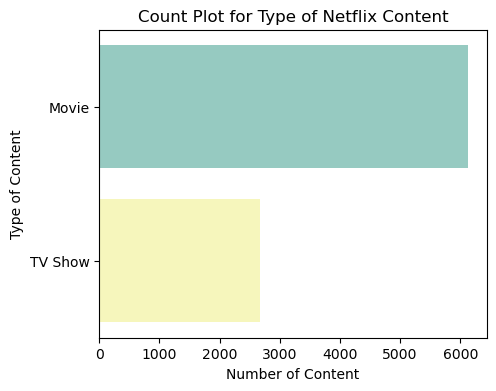

In [29]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(
    data=netflix,
    y="type",
    ax=ax,
    order=["Movie", "TV Show"],
    palette="Set3"
)
ax.set_title("Count Plot for Type of Netflix Content")
ax.set_xlabel("Number of Content")
ax.set_ylabel("Type of Content")
plt.show()

In [ ]:
# Interpretation
# The amount of Movies is more than double the amount of TV Shows.
# Movies are the most common type of content in Netflix.

In [31]:
# Bivariate Analysis

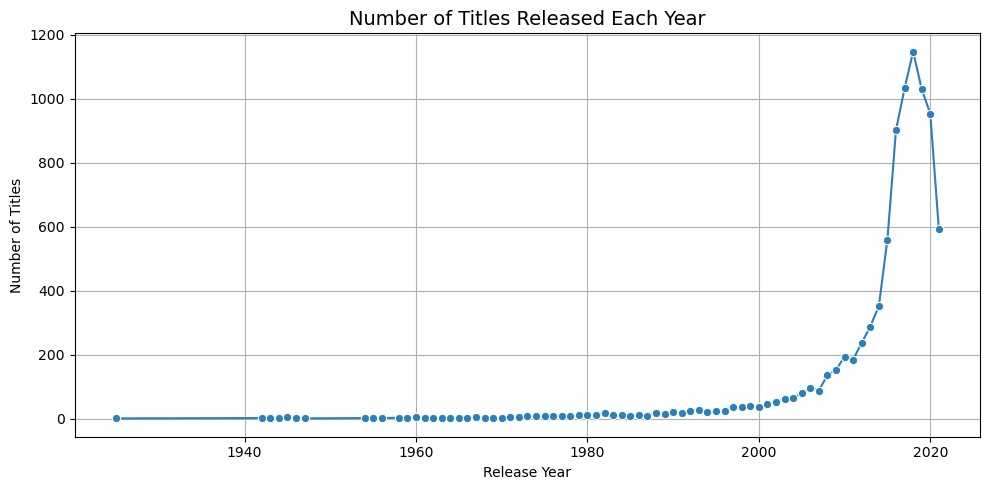

In [ ]:
# Line graph of the release year trends
yearly_counts= netflix['release_year'].value_counts().reset_index()
yearly_counts.columns = ['release_year', 'title_count']
yearly_counts = yearly_counts.sort_values('release_year')

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=yearly_counts, 
    x='release_year', 
    y='title_count',
    marker='o', 
    color='#2c7fb8')

plt.title('Number of Titles Released Each Year', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

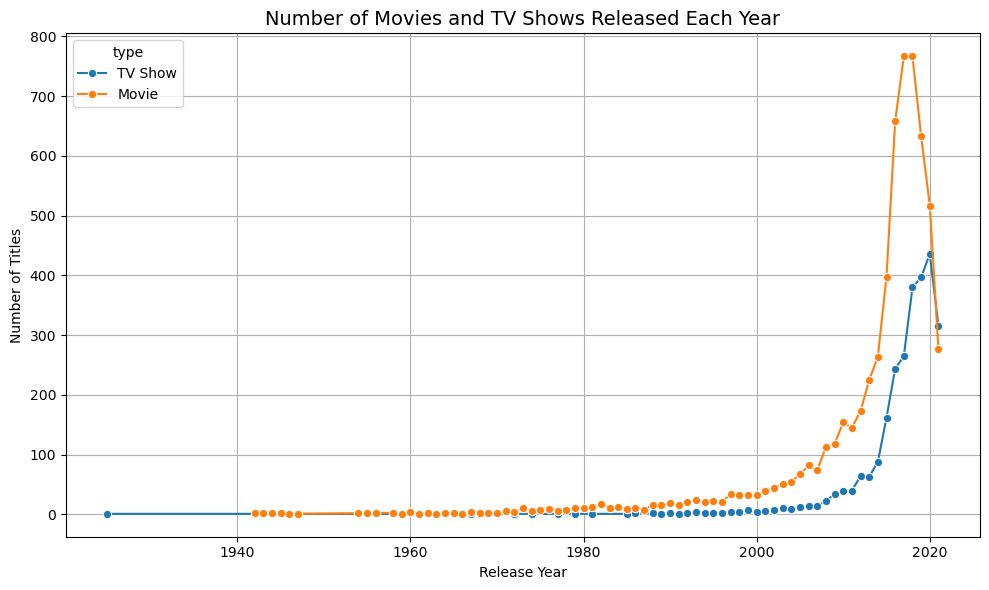

In [44]:
# Release Year Trends separated by Movies and TV Shows on a line graphe
year_type_counts = netflix.groupby(['release_year', 'type']).size().reset_index(name='count')

year_type_counts = year_type_counts.sort_values('release_year')
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=year_type_counts, 
    x='release_year', 
    y='count', 
    hue='type', 
    marker='o')
plt.title('Number of Movies and TV Shows Released Each Year', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()
